## A full working example 

This example concerns the **study of coked hierarchical zeolites**.

In [7]:
from spectrochempy.api import *
options.log_level = ERROR # WARNING # avoid warning messages

Import some additional library

In [8]:
import os

### Introduction

....


### Reading the data

The data, we will be processing come from the AGIR setup at the Laboratory LCS.

We have TGA (Thermogravimetric analysis) and IR (Infrared) data recorded simultaneously, for 3 samples recorded at 350°C :
P (parent), A (acid treatment), B (basic treatment)

The IR data have been exported as `csv` file (on file per spectra) and then zipped. Therefore, we will use the function `read_zip` to open the IR data. 

For the TGA data are in `csv` files, so we use `read_csv` to read them.

To keep the data easily accessible, we create a dictionary `samples`

In [9]:
samples = {'P350':{'label':'$\mathrm{M_P}\,(623\,K)$'},
           'A350':{'label':'$\mathrm{M_A}\,(623\,K)$'}, 
           'B350':{'label':'$\mathrm{M_B}\,(623\,K)$'}}

#### Reading IR data
Note that reading a large set of `.csv` file is rather slow. Be patient! 

After reading each dataset, we save the data in the `scp` format of SpectroChemPy, so that further reading of the data will be much faster.

In [10]:
for key in samples.keys():
    # our data are in our test `scpdata` directory. 
    basename = os.path.join(scpdata,'agirdata/{}/FTIR/FTIR'.format(key))
    if os.path.exists(basename+'.scp'):
        #check if the scp file have already been saved
        filename = basename + '.scp'
        samples[key]['IR'] = NDDataset.read( filename)
    else:
        # else read the original zip file
        filename = basename + '.zip'
        samples[key]['IR'] = NDDataset.read_zip( filename, origin='omnic_export')
    # save
    samples[key]['IR'].save(basename + '.scp')

##### Plot of the raw IR data 

<IPython.core.display.Javascript object>


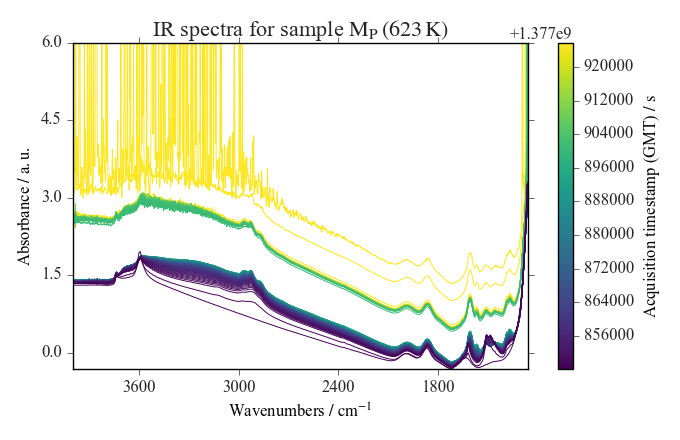

<IPython.core.display.Javascript object>


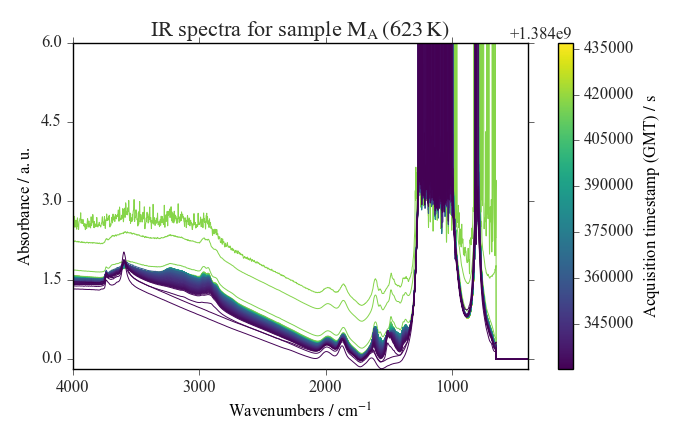

<IPython.core.display.Javascript object>


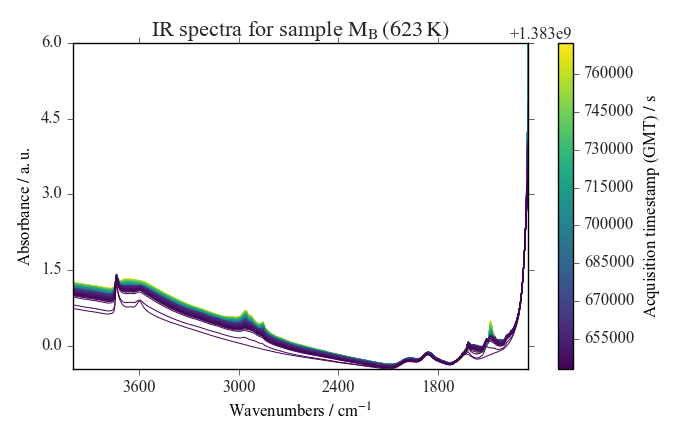

In [11]:
for key in samples.keys():
    figure()
    s = samples[key]['IR']
    s.plot(kind='stack')
    label = samples[key]['label']
    title = 'IR spectra for sample {}'.format(label)
    s.ax.set_title(title, fontsize=16)
    show()

#### Reading TGA data

Now read the TGA data

In [12]:
options.log_level = DEBUG
for key in samples.keys():
    basename = os.path.join(scpdata,'agirdata/{}/TGA/tg'.format(key))
    if os.path.exists(basename+'.scp'):
        #check if the scp file have already been saved
        filename = basename + '.scp'
        samples[key]['TGA'] = NDDataset.read( filename)
    else:
        # else read the original csv file
        filename = basename + '.csv'
        ss = samples[key]['TGA'] = NDDataset.read_csv(filename)
        # lets keep only data from somrthing close to 0.
        s = samples[key]['TGA'] = ss[-0.5:60.0]
        # for TGA, some information are missing. 
        # we add them here
        s.x.units = 'hour'
        s.units = 'weight_percent' 
        s.x.title = 'Time on stream'
        s.title = 'Mass variation'
    # save
    samples[key]['TGA'].save(basename + '.scp')

[SpectroChemPy 2017-11-11 13:13:36] changed default loglevel to 10
[SpectroChemPy 2017-11-11 13:13:36] init data with a non numpy-like array object
[SpectroChemPy 2017-11-11 13:13:36] init data with a non numpy-like array object


TypeError: cannot perform reduce with flexible type

In [ ]:
figure()
# we will plot on the same figure
for key in samples.keys():
    s = samples[key]['TGA']
    s.plot(ylim=(-.1,9))
label = samples[key]['label']
title = 'TG data (623 K)'
s.ax.set_title(title, fontsize=16)
show()